In [5]:
#Notebook to create valve open close timelines for pulsing flow

In [1]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print("This notebook is used to create valve open close timelines for pulsing flow")


This notebook is used to create valve open close timelines for pulsing flow


In [2]:
opened = 1 #How long is valve open
closed = 2 #How long is valve closed

open_time = 1 #How long does it take to open
close_time = 1 #How long does it take to close
num_cycles = 10 #How many cycles to do
time = 70 #How long is the full time
pipe_diam = 0.46 #Pipe diameter
flow_ratio = 1
area = (pipe_diam / 2)**2 * 3.1415 / flow_ratio #Cross section area of valve
closed_area = area / 10000
t = 0

Text(0.5, 1.0, 'Valve Cross Section Over Turn Percentage')

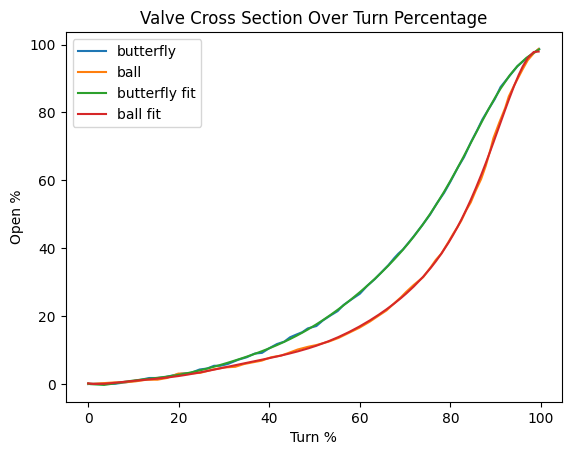

In [3]:
ball = pd.read_csv("ball.csv")
ball_x = ball['turn'].values
ball_y = ball['open'].values

butterfly = pd.read_csv("butterfly.csv")
butterfly_x = butterfly['turn'].values
butterfly_y = butterfly['open'].values

butterfly_coeff = np.polyfit(butterfly_x, butterfly_y, deg=10)
butterfly_fit = np.poly1d(butterfly_coeff)

ball_coeff = np.polyfit(ball_x, ball_y, deg=10)
ball_fit = np.poly1d(ball_coeff)

plt.plot(butterfly_x * 100, butterfly_y * 100, label = "butterfly")
plt.plot(ball_x * 100, ball_y * 100, label = "ball")
plt.plot(butterfly_x * 100, butterfly_fit(butterfly_x) * 100, label = "butterfly fit")
plt.plot(ball_x * 100, ball_fit(ball_x) * 100, label = "ball fit")
plt.xlabel("Turn %")
plt.ylabel("Open %")
plt.legend()
plt.title("Valve Cross Section Over Turn Percentage")

In [4]:
fit = ball_fit

interp_points = 20
valve_open_t_arr = [i * open_time / interp_points for i in range(interp_points + 1)]
valve_close_t_arr = [i * close_time / interp_points + open_time + opened for i in range(interp_points + 1)]

valve_open_arr = [fit(round(i, 3) * 1 / open_time) * area for i in valve_open_t_arr]
valve_close_arr = [fit(1 - round(i - open_time - opened, 3) * 1 / close_time) * area for i in valve_close_t_arr]

print(fit(.05) * area)
print([round(i - open_time - opened, 3) for i in valve_close_t_arr])
print(valve_close_arr)

0.00043622567031047856
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0.1620260219247411, 0.15082235964046117, 0.12127237592637592, 0.09268304230998006, 0.07072481003992472, 0.05510320966419987, 0.04383638145671037, 0.035206706603273595, 0.028287549946974633, 0.022754235891359782, 0.018485978662131537, 0.015266795427803936, 0.012712664672785883, 0.010403571597303533, 0.008096826082249662, 0.005856365798426109, 0.0039658862535649625, 0.002615789851872713, 0.0015793362845129566, 0.0004362256703104796, 0.00037637271890680483]


In [5]:
valve_t_arr = np.concatenate((valve_open_t_arr, valve_close_t_arr))
valve_arr = np.concatenate((valve_open_arr, valve_close_arr))

pulsed_arr = []
pulsed_t_arr = []

for i in range(num_cycles):
    for j in valve_arr:
        pulsed_arr.append(j)
    for j in valve_t_arr:
        pulsed_t_arr.append(i * (open_time + opened + close_time + closed) + j)

pulsed_t_arr.append(time)
pulsed_arr.append(closed_area)

print(pulsed_t_arr)
print(pulsed_arr)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3.0, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3, 10.35, 10.4, 10.45, 10.5, 10.55, 10.6, 10.65, 10.7, 10.75, 10.8, 10.85, 10.9, 10.95, 11.0, 12.0, 12.05, 12.1, 12.15, 12.2, 12.25, 12.3, 12.35, 12.4, 12.45, 12.5, 12.55, 12.6, 12.65, 12.7, 12.75, 12.8, 12.85, 12.9, 12.95, 13.0, 15.0, 15.05, 15.1, 15.15, 15.2, 15.25, 15.3, 15.35, 15.4, 15.45, 15.5, 15.55, 15.6, 15.65, 15.7, 15.75, 15.8, 15.85, 15.9, 15.95, 16.0, 17.0, 17.05, 17.1, 17.15, 17.2, 17.25, 17.3, 17.35, 17.4, 17.45, 17.5, 17.55, 17.6, 17.65, 17.7, 17.75, 17.8, 17.85, 17.9, 17.95, 1

Text(0, 0.5, 'Cross Section (in^2)')

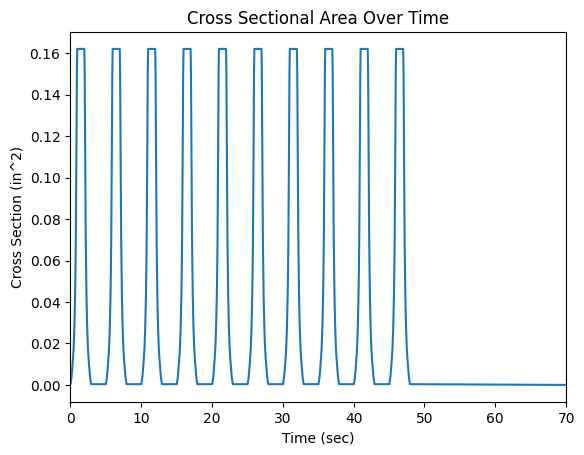

In [6]:
plt.plot(pulsed_t_arr, pulsed_arr)
plt.title("Cross Sectional Area Over Time")
plt.xlim(0, time)
plt.xlabel("Time (sec)")
plt.ylabel("Cross Section (in^2)")

In [7]:
name = "ValveTimeline_1_2_new"
with open(f"{name}.dat", "w") as file:
    file.write(f"{len(pulsed_t_arr)}\n")
    for i in range(len(pulsed_t_arr)):
        file.write(f"{round(pulsed_t_arr[i], 5)}\t{round(pulsed_arr[i], 8)}\n")